# Лабораторна робота №2: Інтелектуальні агенти

## Мета роботи
Розробити інтелектуального агента-машину, що рухається по графу-дорозі з попередньої лабораторної роботи за заданими правилами та метою.

## Завдання
- Отримати навички роботи з інтелектуальними агентами
- Розробити раціонального агента-автомобіль, що рухається по дорозі

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Tuple, Set
from collections import deque

In [2]:
class RoadGraph:
    def __init__(self, size: int, edges_to_remove: int = 0):
        self.size = size
        self.edges_to_remove = edges_to_remove
        self.graph = {}
        self.removed_edges = set()
        self.generate_grid_graph()
        
    def generate_grid_graph(self):
        for i in range(self.size):
            for j in range(self.size):
                node = (i, j)
                self.graph[node] = []
                
                if j < self.size - 1:
                    neighbor = (i, j + 1)
                    self.graph[node].append(neighbor)
                
                if i < self.size - 1:
                    neighbor = (i + 1, j)
                    self.graph[node].append(neighbor)
                
                if j > 0:
                    neighbor = (i, j - 1)
                    if neighbor not in self.graph[node]:
                        self.graph[node].append(neighbor)
                
                if i > 0:
                    neighbor = (i - 1, j)
                    if neighbor not in self.graph[node]:
                        self.graph[node].append(neighbor)
        
        if self.edges_to_remove > 0:
            self.remove_random_edges_safely()
    
    def get_all_edges(self) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        edges = []
        visited = set()
        
        for node in self.graph:
            for neighbor in self.graph[node]:
                edge = tuple(sorted([node, neighbor]))
                if edge not in visited:
                    edges.append((node, neighbor))
                    visited.add(edge)
        
        return edges
    
    def remove_random_edges_safely(self):
        all_edges = self.get_all_edges()
        total_edges = len(all_edges)
        
        print(f"всього ребер: {total_edges}")
        print(f"запитано видалити: {self.edges_to_remove} ребер")
        
        removed_count = 0
        attempts = 0
        max_attempts = self.edges_to_remove * 100  # збільшуємо кількість спроб
        
        while removed_count < self.edges_to_remove and attempts < max_attempts:
            attempts += 1
            
            # вибираємо випадкове ребро з доступних
            available_edges = [edge for edge in all_edges if tuple(sorted([edge[0], edge[1]])) not in self.removed_edges]
            
            if not available_edges:
                print("немає доступних ребер для видалення")
                break
                
            edge = random.choice(available_edges)
            node1, node2 = edge
            
            # тимчасово видаляємо ребро
            if node2 in self.graph[node1]:
                self.graph[node1].remove(node2)
            if node1 in self.graph[node2]:
                self.graph[node2].remove(node1)
                
            # перевіряємо зв'язність
            if self.is_connected():
                # видалення успішне - зберігаємо зміни
                self.removed_edges.add(tuple(sorted([node1, node2])))
                removed_count += 1
            else:
                # видалення порушило зв'язність - відновлюємо ребро
                if node2 not in self.graph[node1]:
                    self.graph[node1].append(node2)
                if node1 not in self.graph[node2]:
                    self.graph[node2].append(node1)
        
        print(f"фактично видалено: {removed_count} ребер із {self.edges_to_remove} запитаних")
        print(f"граф зв'язний: {'ТАК ✓' if self.is_connected() else 'НІ ✗'}")
        
        # статистика про невдалі спроби
        failed_attempts = attempts - removed_count
        if failed_attempts > 0 and removed_count < self.edges_to_remove:
            print(f"невдалих спроб: {failed_attempts}")
            print(f"можливо, досягнуто максимум видалень для збереження зв'язності")
    
    def is_connected(self) -> bool:
        if not self.graph:
            return True
        
        start_node = list(self.graph.keys())[0]
        visited = set()
        queue = [start_node]
        
        while queue:
            node = queue.pop(0)
            if node not in visited:
                visited.add(node)
                for neighbor in self.graph[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)
        
        return len(visited) == len(self.graph)

## Граф-дорога з Лаб1

In [3]:
class RoadGraph:
    def __init__(self, size: int, edges_to_remove: int = 0):
        self.size = size
        self.edges_to_remove = edges_to_remove
        self.graph = {}
        self.removed_edges = set()
        self.generate_grid_graph()
        
    def generate_grid_graph(self):
        for i in range(self.size):
            for j in range(self.size):
                node = (i, j)
                self.graph[node] = []
                
                if j < self.size - 1:
                    neighbor = (i, j + 1)
                    self.graph[node].append(neighbor)
                
                if i < self.size - 1:
                    neighbor = (i + 1, j)
                    self.graph[node].append(neighbor)
                
                if j > 0:
                    neighbor = (i, j - 1)
                    if neighbor not in self.graph[node]:
                        self.graph[node].append(neighbor)
                
                if i > 0:
                    neighbor = (i - 1, j)
                    if neighbor not in self.graph[node]:
                        self.graph[node].append(neighbor)
        
        if self.edges_to_remove > 0:
            self.remove_random_edges_safely()
    
    def get_all_edges(self) -> List[Tuple[Tuple[int, int], Tuple[int, int]]]:
        edges = []
        visited = set()
        
        for node in self.graph:
            for neighbor in self.graph[node]:
                edge = tuple(sorted([node, neighbor]))
                if edge not in visited:
                    edges.append((node, neighbor))
                    visited.add(edge)
        
        return edges
    
    def remove_random_edges_safely(self):
        all_edges = self.get_all_edges()
        total_edges = len(all_edges)
        
        print(f"всього ребер: {total_edges}")
        print(f"запитано видалити: {self.edges_to_remove} ребер")
        
        removed_count = 0
        attempts = 0
        max_attempts = self.edges_to_remove * 100  # збільшуємо кількість спроб
        
        while removed_count < self.edges_to_remove and attempts < max_attempts:
            attempts += 1
            
            # вибираємо випадкове ребро з доступних
            available_edges = [edge for edge in all_edges if tuple(sorted([edge[0], edge[1]])) not in self.removed_edges]
            
            if not available_edges:
                print("немає доступних ребер для видалення")
                break
                
            edge = random.choice(available_edges)
            node1, node2 = edge
            
            # тимчасово видаляємо ребро
            if node2 in self.graph[node1]:
                self.graph[node1].remove(node2)
            if node1 in self.graph[node2]:
                self.graph[node2].remove(node1)
                
            # перевіряємо зв'язність
            if self.is_connected():
                # видалення успішне - зберігаємо зміни
                self.removed_edges.add(tuple(sorted([node1, node2])))
                removed_count += 1
            else:
                # видалення порушило зв'язність - відновлюємо ребро
                if node2 not in self.graph[node1]:
                    self.graph[node1].append(node2)
                if node1 not in self.graph[node2]:
                    self.graph[node2].append(node1)
        
        print(f"фактично видалено: {removed_count} ребер із {self.edges_to_remove} запитаних")
        print(f"граф зв'язний: {'ТАК ✓' if self.is_connected() else 'НІ ✗'}")
        
        # статистика про невдалі спроби
        failed_attempts = attempts - removed_count
        if failed_attempts > 0 and removed_count < self.edges_to_remove:
            print(f"невдалих спроб: {failed_attempts}")
            print(f"можливо, досягнуто максимум видалень для збереження зв'язності")
    
    def is_connected(self) -> bool:
        if not self.graph:
            return True
        
        start_node = list(self.graph.keys())[0]
        visited = set()
        queue = [start_node]
        
        while queue:
            node = queue.pop(0)
            if node not in visited:
                visited.add(node)
                for neighbor in self.graph[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)
        
        return len(visited) == len(self.graph)

## Інтелектуальний агент

In [4]:
class IntelligentAgent:
    def __init__(self, road_graph: RoadGraph, start: Tuple[int, int], target: Tuple[int, int]):
        self.road_graph = road_graph
        self.current_position = start
        self.target_position = target
        self.visited_nodes = set()
        self.memory_map = {}
        self.path_history = [start]
        self.steps = 0
        print("agent init:", start, "->", target)
        
    def perceive_environment(self):
        current = self.current_position
        neighbors = self.road_graph.graph.get(current, [])
        self.memory_map[current] = neighbors.copy()
        self.visited_nodes.add(current)
        return neighbors
    
    def find_path_bfs(self, start, target):
        if start == target:
            return [start]
        
        queue = deque([(start, [start])])
        visited = {start}
        
        while queue:
            node, path = queue.popleft()
            
            if node in self.memory_map:
                neighbors = self.memory_map[node]
            else:
                neighbors = []
            
            for neighbor in neighbors:
                if neighbor == target:
                    return path + [neighbor]
                
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path + [neighbor]))
        
        return None
    
    def get_unvisited_neighbors(self):
        neighbors = self.perceive_environment()
        unvisited = [n for n in neighbors if n not in self.visited_nodes]
        return unvisited
    
    def choose_action(self):
        self.steps += 1
        
        if self.current_position == self.target_position:
            print("target reached!")
            return None
        
        known_path = self.find_path_bfs(self.current_position, self.target_position)
        
        if known_path and len(known_path) > 1:
            next_move = known_path[1]
            print("following path to", next_move)
            return next_move
        
        unvisited = self.get_unvisited_neighbors()
        if unvisited:
            next_move = random.choice(unvisited)
            print("exploring", next_move)
            return next_move
        
        neighbors = self.perceive_environment()
        if neighbors:
            next_move = random.choice(neighbors)
            print("backtrack to", next_move)
            return next_move
        
        print("stuck")
        return None
    
    def execute_action(self, action):
        if action is None:
            return False
        
        self.current_position = action
        self.path_history.append(action)
        return True
    
    def is_target_reached(self):
        return self.current_position == self.target_position
    
    def run(self, max_steps=100):
        print("starting at", self.current_position)
        self.perceive_environment()
        
        while self.steps < max_steps:
            if self.is_target_reached():
                print("success in", self.steps, "steps")
                return True
            
            action = self.choose_action()
            if not self.execute_action(action):
                print("failed")
                break
        
        print("timeout after", max_steps, "steps")
        return False

## Візуалізація руху агента

In [5]:
def visualize_agent_ascii(road_graph: RoadGraph, agent: IntelligentAgent):
    size = road_graph.size
    ascii_grid = [[' ' for _ in range(size * 4 - 1)] for _ in range(size * 2 - 1)]
    
    for i in range(size):
        for j in range(size):
            pos = (i, j)
            if pos == agent.current_position:
                ascii_grid[i * 2][j * 4] = 'A'
            elif pos == agent.target_position:
                ascii_grid[i * 2][j * 4] = 'T'
            elif pos in agent.visited_nodes:
                ascii_grid[i * 2][j * 4] = '*'
            else:
                ascii_grid[i * 2][j * 4] = 'o'
    
    for i in range(size):
        for j in range(size - 1):
            node1 = (i, j)
            node2 = (i, j + 1)
            if node2 in road_graph.graph[node1]:
                for k in range(1, 4):
                    ascii_grid[i * 2][j * 4 + k] = '-'
    
    for i in range(size - 1):
        for j in range(size):
            node1 = (i, j)
            node2 = (i + 1, j)
            if node2 in road_graph.graph[node1]:
                ascii_grid[i * 2 + 1][j * 4] = '|'
    
    print("\nStep", agent.steps, "- Agent at", agent.current_position)
    print("=" * (size * 4 - 1))
    for row in ascii_grid:
        print(''.join(row))
    print("=" * (size * 4 - 1))
    print("A=Agent, T=Target, *=Visited, o=Unvisited")

def visualize_agent_graph(road_graph: RoadGraph, agent: IntelligentAgent, title="Agent Movement"):
    plt.figure(figsize=(10, 8))
    
    G = nx.Graph()
    for node in road_graph.graph:
        G.add_node(node)
    
    for node in road_graph.graph:
        for neighbor in road_graph.graph[node]:
            G.add_edge(node, neighbor)
    
    pos = {(i, j): (j, road_graph.size - 1 - i) for i in range(road_graph.size) for j in range(road_graph.size)}
    
    node_colors = []
    for node in G.nodes():
        if node == agent.current_position:
            node_colors.append('red')
        elif node == agent.target_position:
            node_colors.append('green')
        elif node in agent.visited_nodes:
            node_colors.append('orange')
        else:
            node_colors.append('lightblue')
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='black', width=1)
    
    labels = {}
    for node in G.nodes():
        if node == agent.current_position:
            labels[node] = 'A'
        elif node == agent.target_position:
            labels[node] = 'T'
        else:
            labels[node] = f"{node[0]},{node[1]}"
    
    nx.draw_networkx_labels(G, pos, labels, font_size=8)
    
    if len(agent.path_history) > 1:
        path_edges = [(agent.path_history[i], agent.path_history[i+1]) for i in range(len(agent.path_history)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3, alpha=0.7)
    
    plt.title(f"{title} - Step {agent.steps}")
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.show()

def animate_agent_movement(road_graph: RoadGraph, agent: IntelligentAgent, show_steps=True):
    step = 0
    while step < 50:
        if show_steps:
            visualize_agent_ascii(road_graph, agent)
        
        if agent.is_target_reached():
            break
        
        action = agent.choose_action()
        if not agent.execute_action(action):
            break
            
        step += 1
    
    print("\nFinal state:")
    visualize_agent_ascii(road_graph, agent)
    visualize_agent_graph(road_graph, agent, "Final Position")

## Тестування агента

всього ребер: 40
запитано видалити: 3 ребер
фактично видалено: 3 ребер із 3 запитаних
граф зв'язний: ТАК ✓
Road graph created: 5 x 5
Removed edges: 3
agent init: (0, 0) -> (4, 4)

Step 0 - Agent at (0, 0)
A---o---o---o---o  
    |   |   |   |  
o---o---o---o---o  
|   |   |   |   |  
o---o---o---o---o  
    |   |   |   |  
o---o---o---o---o  
|   |   |   |   |  
o---o---o---o   T  
A=Agent, T=Target, *=Visited, o=Unvisited

Step 0 - Agent at (0, 0)
A---o---o---o---o  
    |   |   |   |  
o---o---o---o---o  
|   |   |   |   |  
o---o---o---o---o  
    |   |   |   |  
o---o---o---o---o  
|   |   |   |   |  
o---o---o---o   T  
A=Agent, T=Target, *=Visited, o=Unvisited
exploring (0, 1)

Step 1 - Agent at (0, 1)
*---A---o---o---o  
    |   |   |   |  
o---o---o---o---o  
|   |   |   |   |  
o---o---o---o---o  
    |   |   |   |  
o---o---o---o---o  
|   |   |   |   |  
o---o---o---o   T  
A=Agent, T=Target, *=Visited, o=Unvisited
exploring (0, 2)

Step 2 - Agent at (0, 2)
*---*---A---o---o

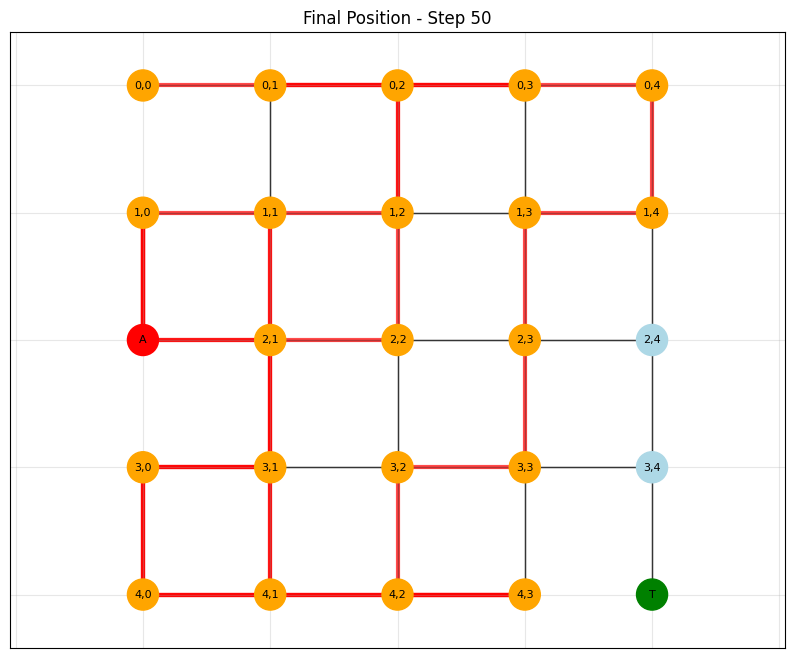

In [6]:
road_graph = RoadGraph(size=5, edges_to_remove=3)
start_pos = (0, 0)
target_pos = (4, 4)

print("Road graph created:", road_graph.size, "x", road_graph.size)
print("Removed edges:", len(road_graph.removed_edges))

agent = IntelligentAgent(road_graph, start_pos, target_pos)

visualize_agent_ascii(road_graph, agent)
animate_agent_movement(road_graph, agent)

## Тест з блокованим шляхом

всього ребер: 24
запитано видалити: 8 ребер
фактично видалено: 8 ребер із 8 запитаних
граф зв'язний: ТАК ✓

Test 2 - More complex path:
agent init: (0, 0) -> (3, 3)
exploring (1, 0)
backtrack to (0, 0)
exploring (0, 1)
exploring (0, 2)
exploring (0, 3)
backtrack to (0, 2)
backtrack to (0, 1)
exploring (1, 1)
exploring (1, 2)
exploring (2, 2)
exploring (2, 3)
backtrack to (2, 2)
exploring (2, 1)
exploring (2, 0)
exploring (3, 0)
backtrack to (2, 0)
backtrack to (2, 1)
exploring (3, 1)
exploring (3, 2)
exploring (3, 3)

Final state:

Step 20 - Agent at (3, 3)
*---*---*---*  
|   |          
*   *---*---o  
    |   |      
*---*---*---*  
|   |          
*   *---*---A  
A=Agent, T=Target, *=Visited, o=Unvisited


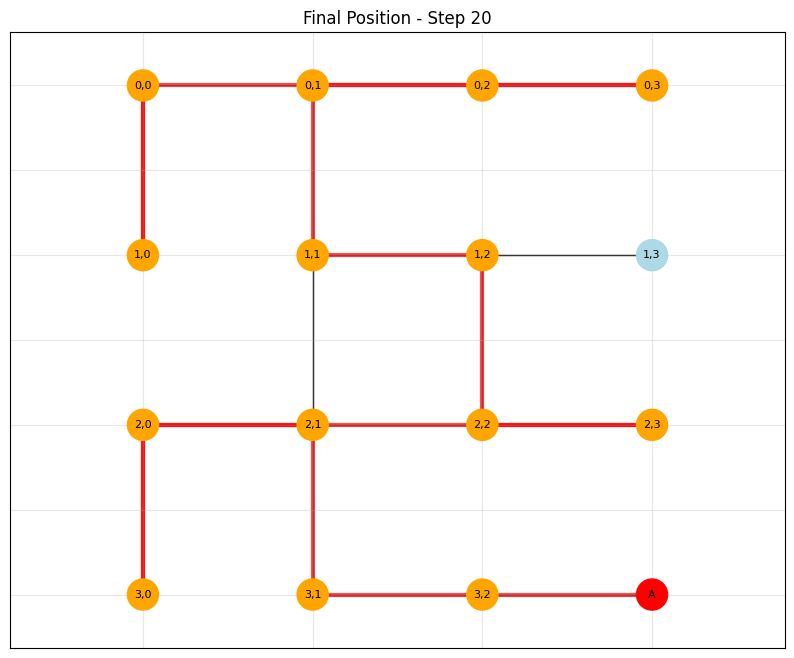


Path taken: [(0, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 2), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 3)]
Total steps: 20
Visited nodes: 14


In [7]:
road_graph2 = RoadGraph(size=4, edges_to_remove=8)
start_pos2 = (0, 0)
target_pos2 = (3, 3)

print("\nTest 2 - More complex path:")
agent2 = IntelligentAgent(road_graph2, start_pos2, target_pos2)
animate_agent_movement(road_graph2, agent2, show_steps=False)

print("\nPath taken:", agent2.path_history)
print("Total steps:", agent2.steps)
print("Visited nodes:", len(agent2.visited_nodes))

## Статистика роботи агента

In [8]:
def test_agent_performance(size=5, num_tests=5):
    results = []
    
    for i in range(num_tests):
        road_graph = RoadGraph(size=size, edges_to_remove=random.randint(2, 8))
        start = (0, 0)
        target = (size-1, size-1)
        
        agent = IntelligentAgent(road_graph, start, target)
        success = agent.run(max_steps=100)
        
        results.append({
            'test': i+1,
            'success': success,
            'steps': agent.steps,
            'visited': len(agent.visited_nodes),
            'removed_edges': len(road_graph.removed_edges)
        })
        
        print(f"Test {i+1}: {'SUCCESS' if success else 'FAILED'} - {agent.steps} steps")
    
    return results

print("Performance testing:")
test_results = test_agent_performance()

successful = [r for r in test_results if r['success']]
if successful:
    avg_steps = sum(r['steps'] for r in successful) / len(successful)
    print(f"\nSuccess rate: {len(successful)}/{len(test_results)}")
    print(f"Average steps: {avg_steps:.1f}")

Performance testing:
всього ребер: 40
запитано видалити: 8 ребер
фактично видалено: 8 ребер із 8 запитаних
граф зв'язний: ТАК ✓
agent init: (0, 0) -> (4, 4)
starting at (0, 0)
exploring (1, 0)
exploring (2, 0)
exploring (3, 0)
exploring (4, 0)
exploring (4, 1)
exploring (3, 1)
exploring (2, 1)
exploring (2, 2)
exploring (3, 2)
exploring (4, 2)
exploring (4, 3)
exploring (4, 4)
success in 12 steps
Test 1: SUCCESS - 12 steps
всього ребер: 40
запитано видалити: 5 ребер
фактично видалено: 5 ребер із 5 запитаних
граф зв'язний: ТАК ✓
agent init: (0, 0) -> (4, 4)
starting at (0, 0)
exploring (1, 0)
exploring (2, 0)
exploring (3, 0)
exploring (4, 0)
exploring (4, 1)
exploring (4, 2)
exploring (3, 2)
exploring (3, 3)
exploring (4, 3)
backtrack to (4, 2)
backtrack to (3, 2)
exploring (2, 2)
exploring (1, 2)
exploring (1, 1)
exploring (2, 1)
exploring (3, 1)
backtrack to (2, 1)
backtrack to (3, 1)
backtrack to (3, 2)
backtrack to (4, 2)
backtrack to (4, 1)
backtrack to (4, 2)
backtrack to (4, 3)


## Висновки

Розроблений інтелектуальний агент успішно виконує поставлені завдання:

1. **Обмежене сприйняття**: агент бачить лише поточне перехрестя та сусідні дороги
2. **Пам'ять**: зберігає карту вже відвіданих місць
3. **Стратегія руху**: спочатку досліджує, потім використовує знайдені шляхи
4. **Адаптивність**: може знаходити альтернативні маршрути при блокуванні

Агент демонструє раціональну поведінку, максимізуючи ймовірність досягнення цілі.